# Visualize A->B Difference

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
def plot_diff(real_A_path, fake_B_path, title=''):
    realA = np.array(Image.open(real_A_path))
    fakeB = np.array(Image.open(fake_B_path))    
    diff = np.abs(realA-fakeB)
    plt.figure(figsize=(20,6))
    plt.suptitle(title, fontsize=20)
    plt.subplot(131)
    plt.imshow(realA, cmap='gray')
    plt.title('original syn CT')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(fakeB, cmap='gray')
    plt.title('fake real CT')
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(diff, cmap='viridis')
    plt.title('absolute difference')
    plt.axis('off')
    plt.show()

In [12]:
def compare(real_A_path, fake_B_path, real_A_mask_path, diff_path, title=''):
    realA = np.array(Image.open(real_A_path))
    fakeB = np.array(Image.open(fake_B_path))
    realA_mask = np.array(Image.open(real_A_mask_path))
    diff = np.array(Image.open(diff_path))
    
    #merged = np.where((np.array(Image.open(real_A_mask_path).convert('L')) / 255).astype(np.bool_), fakeB, realA)
    
    plt.figure(figsize=(23,6))
    plt.suptitle(title, fontsize=20)
    plt.subplot(141)
    plt.imshow(realA, cmap='gray')
    plt.title('original syn CT')
    plt.axis('off')
    plt.subplot(142)
    plt.imshow(fakeB, cmap='gray')
    plt.title('fake real CT')
    plt.axis('off')
    # plt.subplot(153)
    # plt.imshow(merged, cmap='gray')
    # plt.title('merged')
    # plt.axis('off')
    plt.subplot(143)
    plt.imshow(realA_mask, cmap='gray')
    plt.title('original syn CT mask')
    plt.axis('off')
    plt.subplot(144)
    plt.imshow(diff, cmap='viridis')
    plt.title('absolute difference')
    plt.axis('off')
    plt.show()

In [8]:
def merge(real_A_path, fake_B_path, real_A_mask_path):
    realA = np.array(Image.open(real_A_path))
    fakeB = np.array(Image.open(fake_B_path))
    realA_mask = Image.open(real_A_mask_path)
    # to grayscale
    realA_mask = (np.array(realA_mask.convert('L')) / 255).astype(np.bool_)
    
    # merge realA and fakeB
    merged = np.where(realA_mask, fakeB, realA)
    plt.figure(figsize=(25,6))
    plt.subplot(141)
    plt.imshow(realA, cmap='gray')
    plt.title('original syn CT')
    plt.axis('off')
    plt.subplot(142)
    plt.imshow(fakeB, cmap='gray')
    plt.title('fake real CT')
    plt.axis('off')
    plt.subplot(143)
    plt.imshow(merged, cmap='gray')
    plt.title('merged')
    plt.axis('off')
    plt.subplot(144)
    plt.imshow(realA_mask, cmap='gray')
    plt.title('original syn CT mask')
    plt.axis('off')
    plt.show()

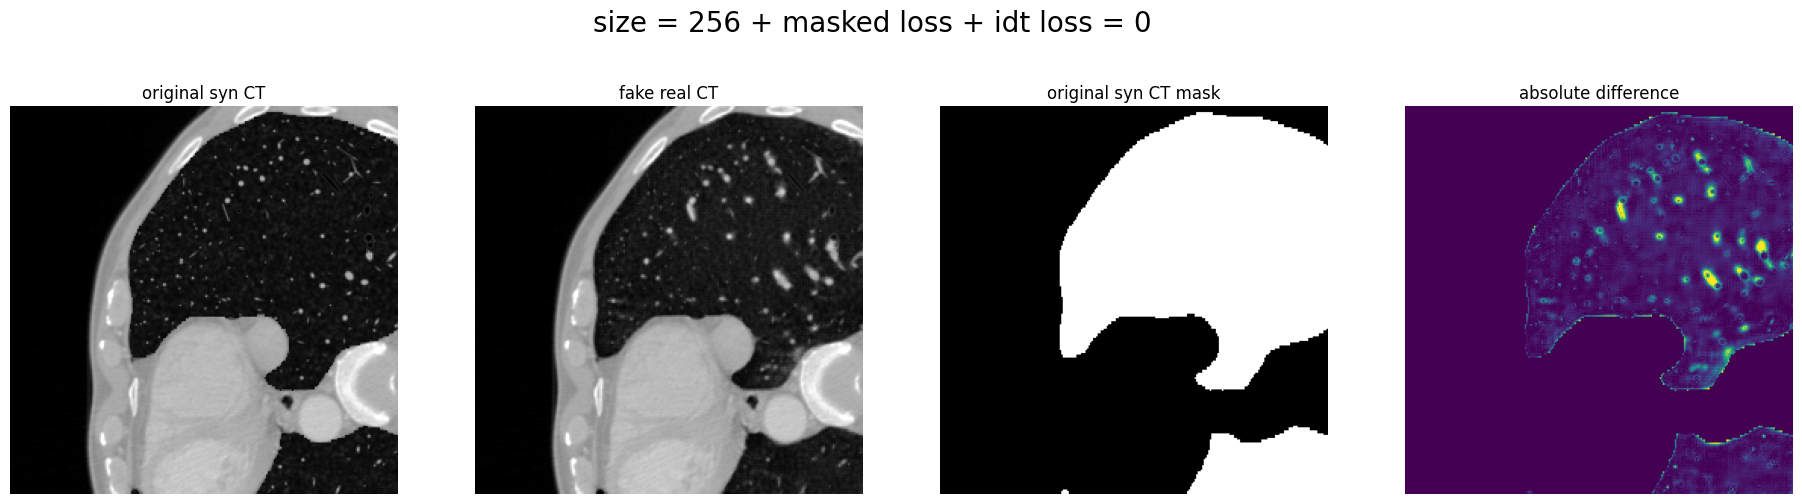

In [13]:
epoch = 198
experiment = 'idt0_size256'
title = 'size = 256 + masked loss + idt loss = 0'
compare(f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_fake_B.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A_mask.png', f'checkpoints/{experiment}/web/images/epoch{epoch}_diff_AB.png', title=title)

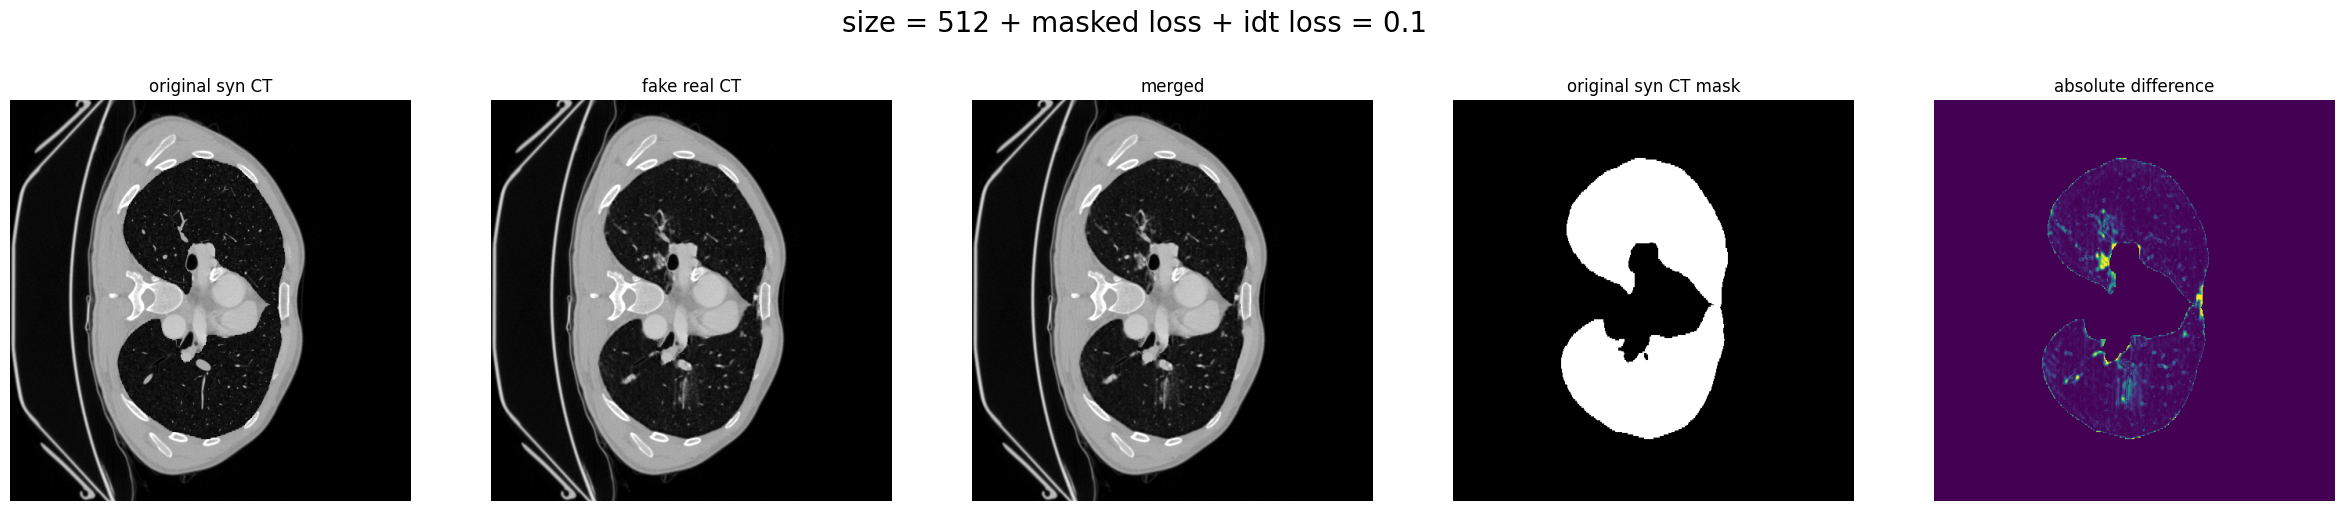

In [6]:
epoch = 199
experiment = 'syn2CT_2_size512_idt0.1_masked'
title = 'size = 512 + masked loss + idt loss = 0.1'
compare(f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_fake_B.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A_mask.png', f'checkpoints/{experiment}/web/images/epoch{epoch}_diff_AB.png', title=title)

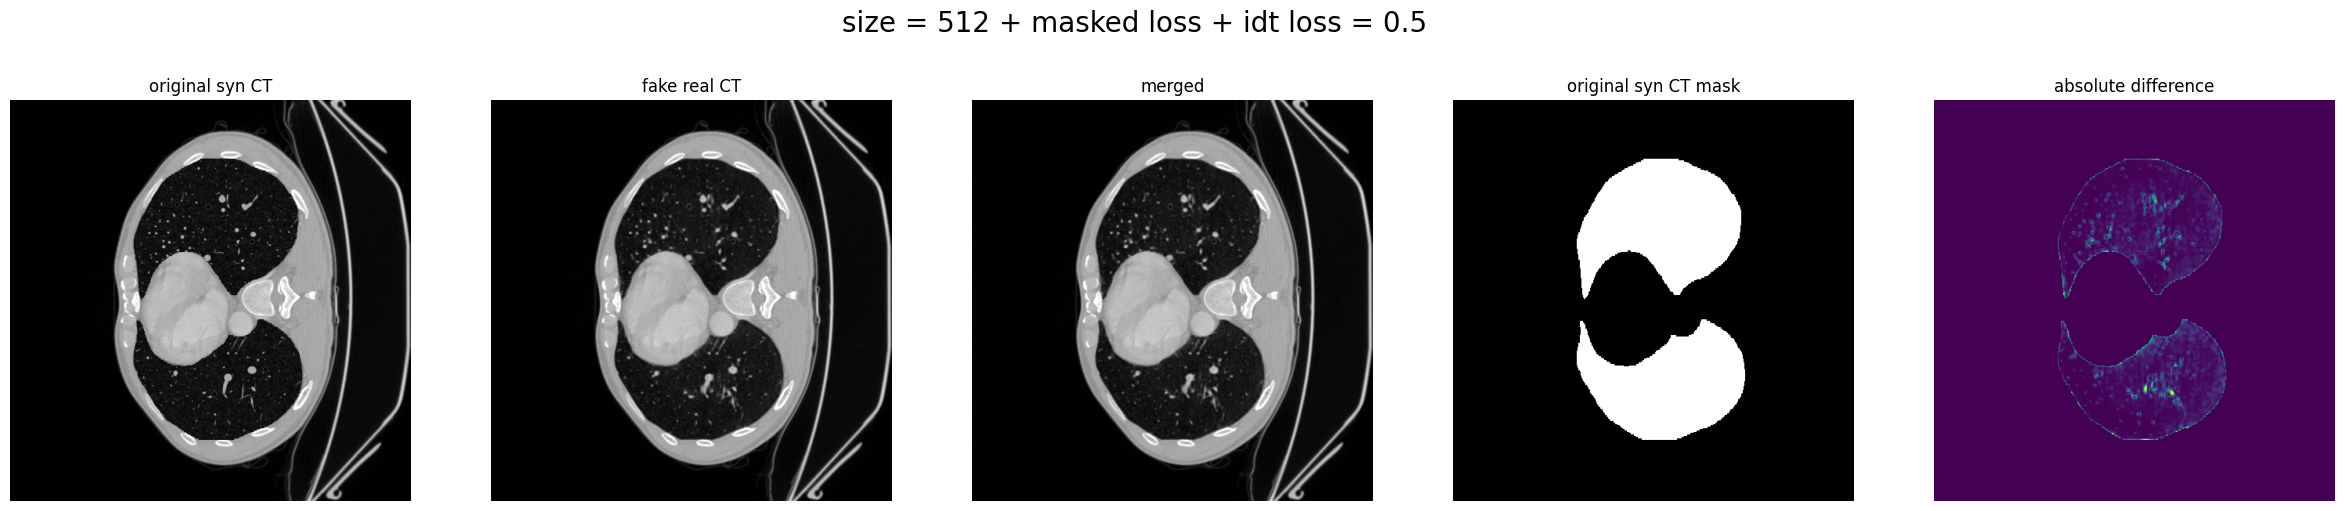

In [7]:
epoch = 200
experiment = 'syn2CT_2_size512_idt0.5_masked'
title = 'size = 512 + masked loss + idt loss = 0.5'
compare(f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_fake_B.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A_mask.png', f'checkpoints/{experiment}/web/images/epoch{epoch}_diff_AB.png', title=title)

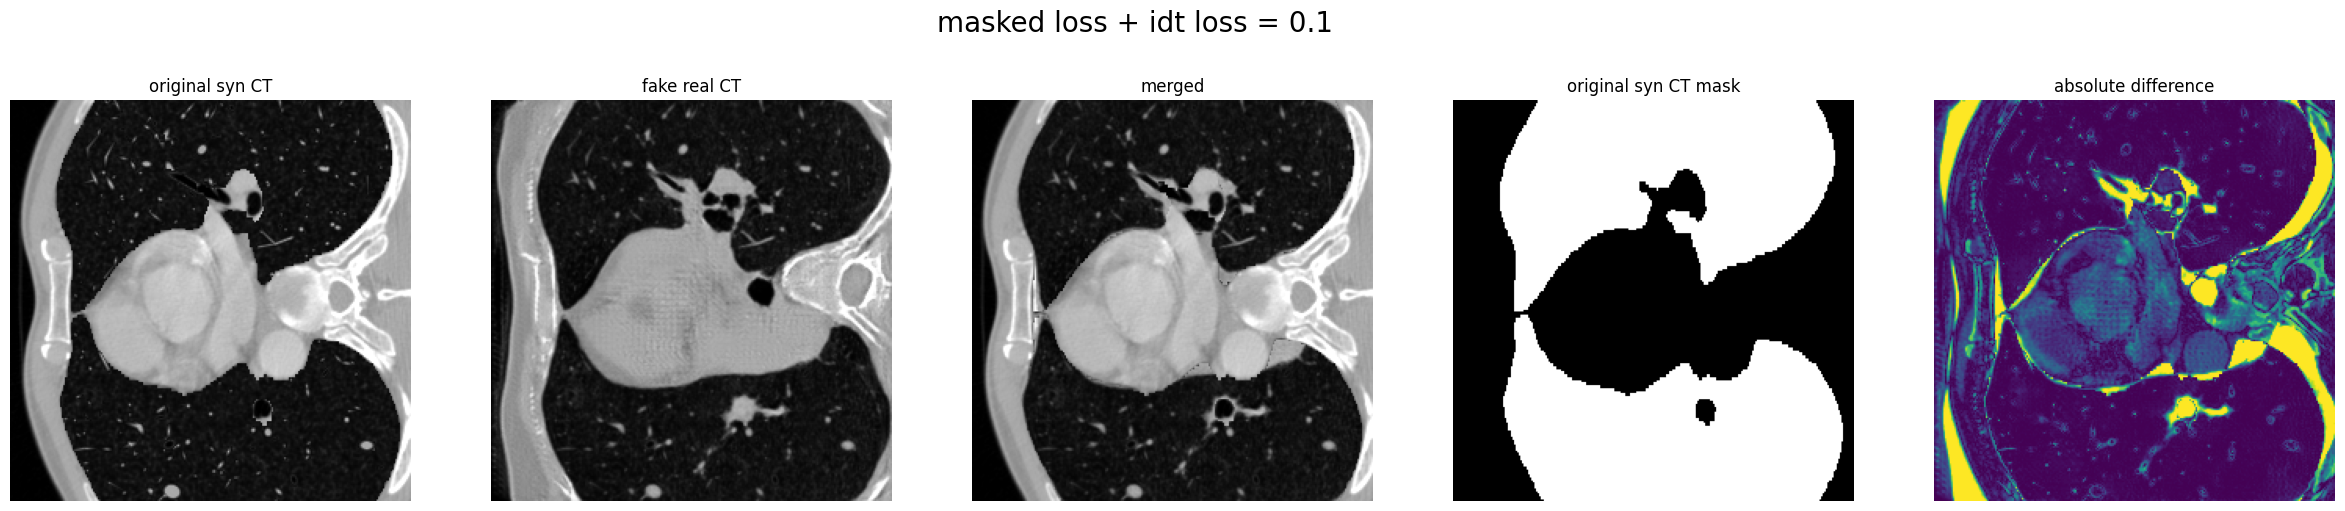

In [30]:
epoch = 194
experiment = 'syn2CT_masked_idt0.1'
title = 'masked loss + idt loss = 0.1'
compare(f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_fake_B.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A_mask.png', f'checkpoints/{experiment}/web/images/epoch{epoch}_diff_AB.png', title=title)

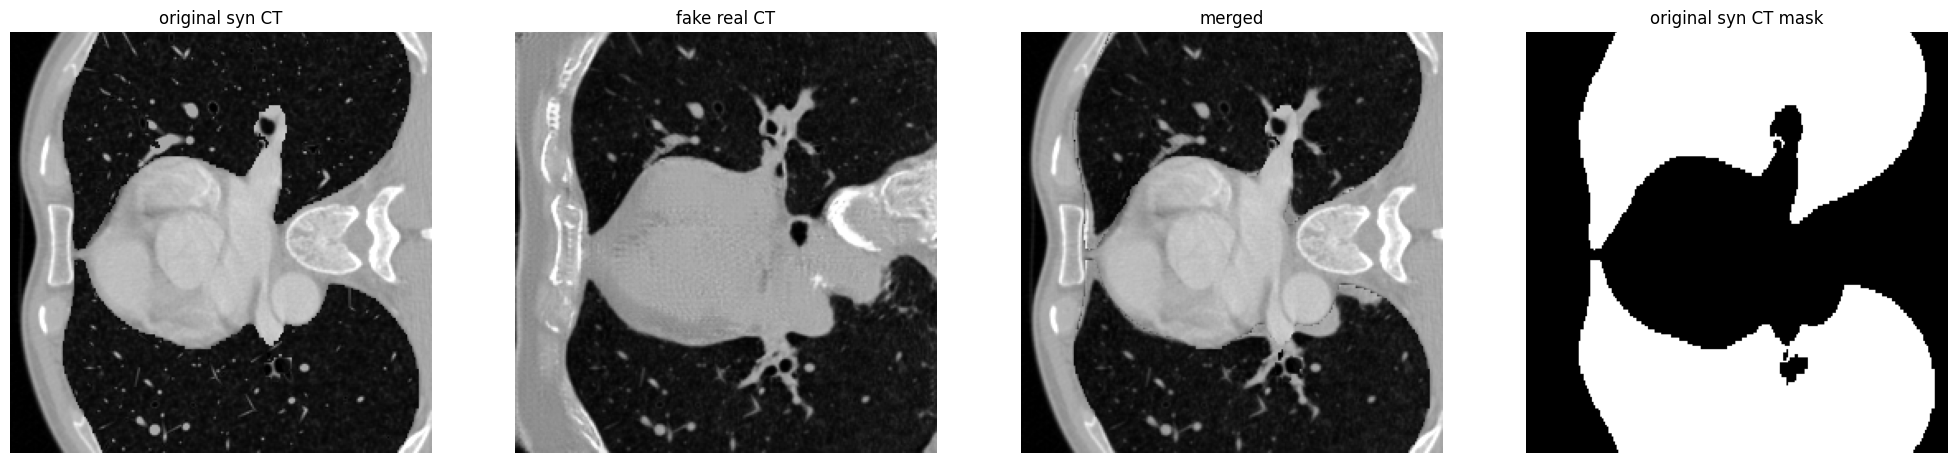

In [23]:
epoch = 195
experiment = 'syn2CT_masked_idt0.1'
merge(f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_fake_B.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A_mask.png')

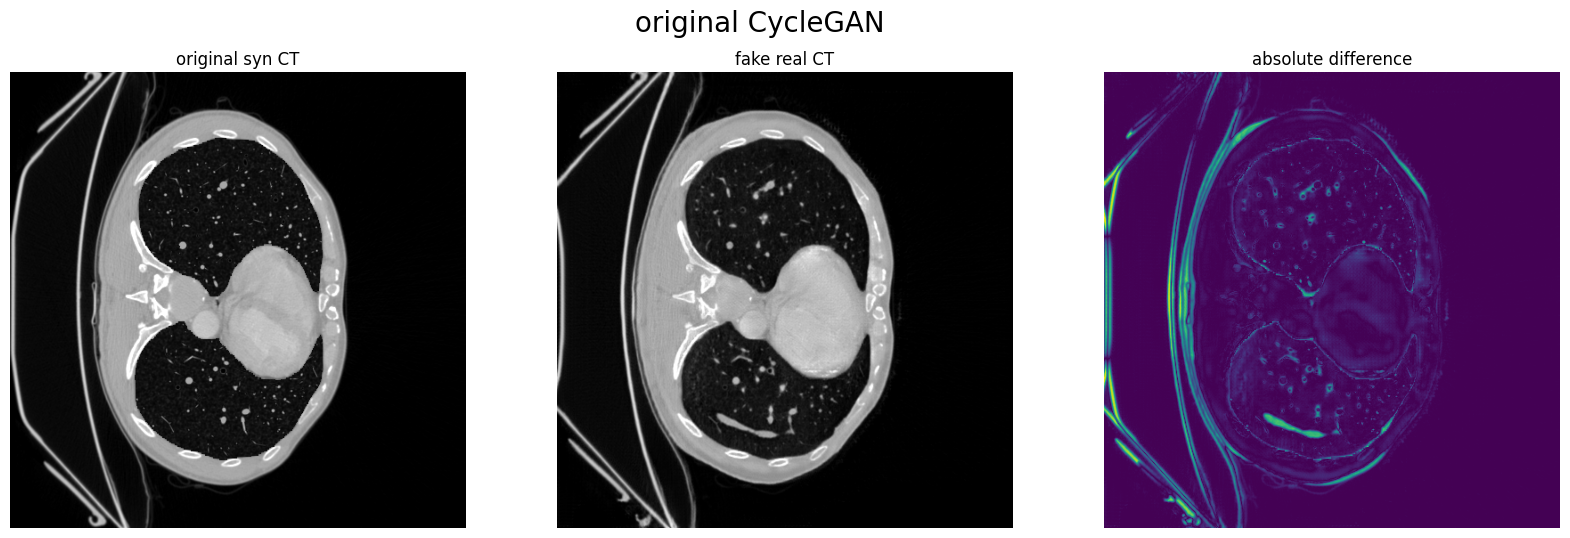

In [53]:
epoch = 195 # 197, 195
experiment = 'syn2CT'
title = 'original CycleGAN'
plot_diff(f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_fake_B.tiff', title=title)

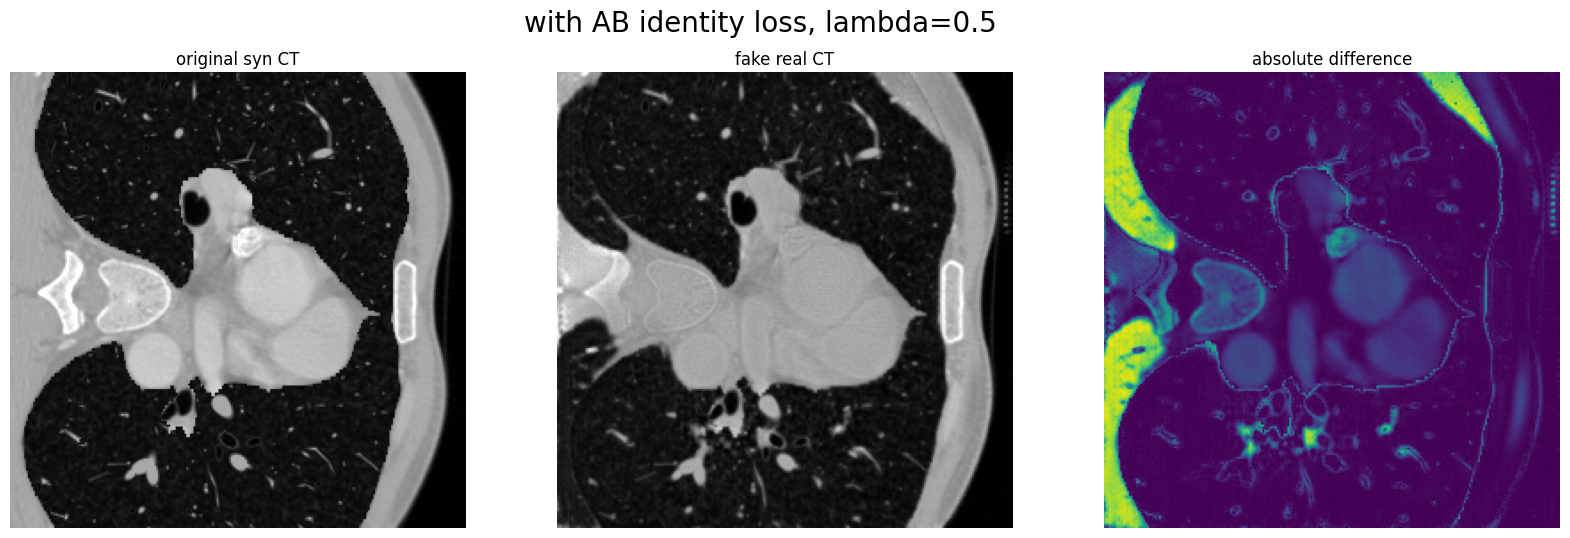

In [46]:
epoch = 198 # 194, 198
experiment = 'syn2CT_idt_crop_256_05'
title = 'with AB identity loss, lambda=0.5'
plot_diff(f'checkpoints/{experiment}/web/images/epoch{epoch}_real_A.tiff', f'checkpoints/{experiment}/web/images/epoch{epoch}_fake_B.tiff', title=title)

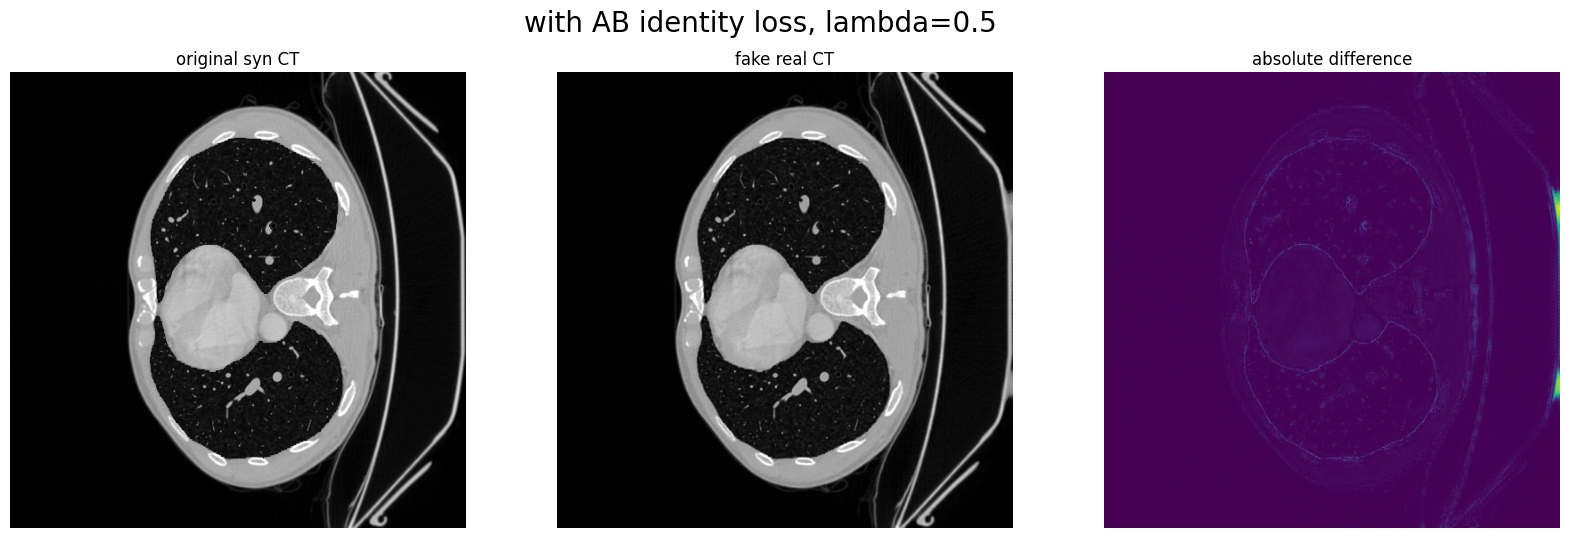

In [50]:
epoch = 'latest'
image = 31
experiment = 'syn2CT_idt_crop_256_05'
title = 'with AB identity loss, lambda=0.5'
plot_diff(f'results/{experiment}/test_{epoch}/images/{image:04d}_real_A.tiff', f'results/{experiment}/test_{epoch}/images/{image:04d}_fake_B.tiff', title=title)

# Inference

In [1]:
from options.test_options import TestOptions
from models import create_model
import sys
import os
import argparse

In [10]:
%tb
opt = TestOptions()
opt.dataroot = 'datasets/syn2CT'
opt.name = 'syn2CT'
opt.checkpoints_dir = 'checkpoints/195'
opt.model = 'test'
opt.gpu_ids = '0'
opt.isTrain = 'False'
opt.preprocess = 'none'
opt.num_threads = 0   # test code only supports num_threads = 0
opt.batch_size = 1    # test code only supports batch_size = 1
opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
opt.display_id = -1
#opt.gather_options()
model = create_model(opt)
model.setup(opt)

AttributeError: 'TestOptions' object has no attribute 'isTrain'

AssertionError: 

In [3]:

opt.dataroot

'datasets/syn2CT'